# Visualization gallery

The visualization methods implemented in PEtab Select are demonstrated here. These methods generally visualize the output of a model selection task, so the input is generally a list of already-calibrated models.

All dependencies for these plots can be installed with `pip install petab_select[plot]`.

In this notebook, some calibrated models that were saved to disk with the `to_yaml` method of a `Models` object, are loaded and used as input here. This is the result of a forward selection with the problem provided in `calibrated_models`. Note that a `Models` object is expect here; if you have a list of models `model_list`, simply use `models = Models(model_list)`.

In [1]:
import matplotlib

import petab_select
import petab_select.plot
from petab_select import VIRTUAL_INITIAL_MODEL_HASH

models = petab_select.Models.from_yaml(
    "calibrated_models/calibrated_models.yaml"
)

In [2]:
models.df.style.background_gradient(
    cmap=matplotlib.colormaps.get_cmap("summer"),
    subset=[petab_select.Criterion.AICC],
)

,model_id,model_hash,Criterion.NLLH,Criterion.AIC,Criterion.AICC,Criterion.BIC,iteration,predecessor_model_hash,estimated_parameters
0,M_0-000,M_0-000,17.487615,None,37.975230,None,1,virtual_initial_model-,{'sigma_x2': 4.462298422134608}
1,M_1-000,M_1-000,-4.087703,None,-0.175406,None,2,M_0-000,"{'k3': 0.0, 'sigma_x2': 0.12242920113658338}"
2,M_2-000,M_2-000,-4.137257,None,-0.274514,None,2,M_0-000,"{'k2': 0.10147824307890803, 'sigma_x2': 0.12142219599557078}"
3,M_3-000,M_3-000,-4.352664,None,-0.705327,None,2,M_0-000,"{'k1': 0.20160925279667963, 'sigma_x2': 0.11714017664827497}"
4,M_5-000,M_5-000,-4.352664,None,9.294673,None,3,M_3-000,"{'k1': 0.20160925279667963, 'k3': 0.0, 'sigma_x2': 0.11714017664827497}"
5,M_6-000,M_6-000,-5.073915,None,7.852170,None,3,M_3-000,"{'k1': 0.20924804320838675, 'k2': 0.0859052351446815, 'sigma_x2': 0.10386846319370771}"
6,M_7-000,M_7-000,-6.028235,None,35.943530,None,4,M_3-000,"{'k1': 0.6228488917665873, 'k2': 0.020189424009226256, 'k3': 0.0010850434974038557, 'sigma_x2': 0.08859278245811462}"


We customize the labels here to just be the second part of a model hash: a binary string that describes their estimated parameters. We additionally set a custom color for a couple of models, and the default color for the other models. We also set a nicer label for the "virtual initial model", which is a hypothetical model that PEtab Select uses by default to initialize a forward search (with no parameters).

In [3]:
# Custom labels
labels = {}
for model in models:
    labels[model.get_hash()] = "M_" + "".join(
        "1" if value == petab_select.ESTIMATE else "0"
        for value in model.parameters.values()
    )
labels[VIRTUAL_INITIAL_MODEL_HASH] = "\n".join(
    petab_select.VIRTUAL_INITIAL_MODEL.split("_")
).title()

# Custom colors for some models
colors = {
    "M_000": "lightgreen",
    "M_001": "lightgreen",
}

# Change default color
petab_select.plot.NORMAL_NODE_COLOR = "darkgray"

## UpSet plot

This shows models ordered by criterion, with their parameters directly below the bars.

A black dot indicates that the parameter (e.g `k2`) is estimated in the model (e.g. the first bar is a model with `k1` and `sigma_x2` estimated).

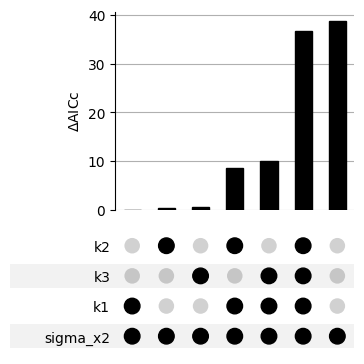

In [4]:
petab_select.plot.upset(models=models, criterion=petab_select.Criterion.AICC);

## Best model from each iteration

This shows strict improvements in the criterion, and the corresponding model, across all iterations of model selection.

Since there were no improvements after `M_100`, no other iterations or models are shown.

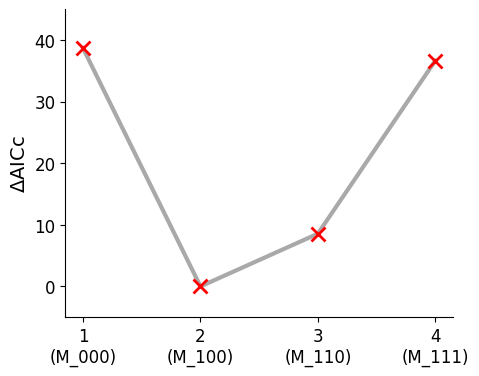

In [5]:
petab_select.plot.line_best_by_iteration(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
);

## Selection history trajectory

This shows the relationship between models across iterations. For example, `M_000` was the predecessor model to `M_001`, `M_010`, and `M_100`.

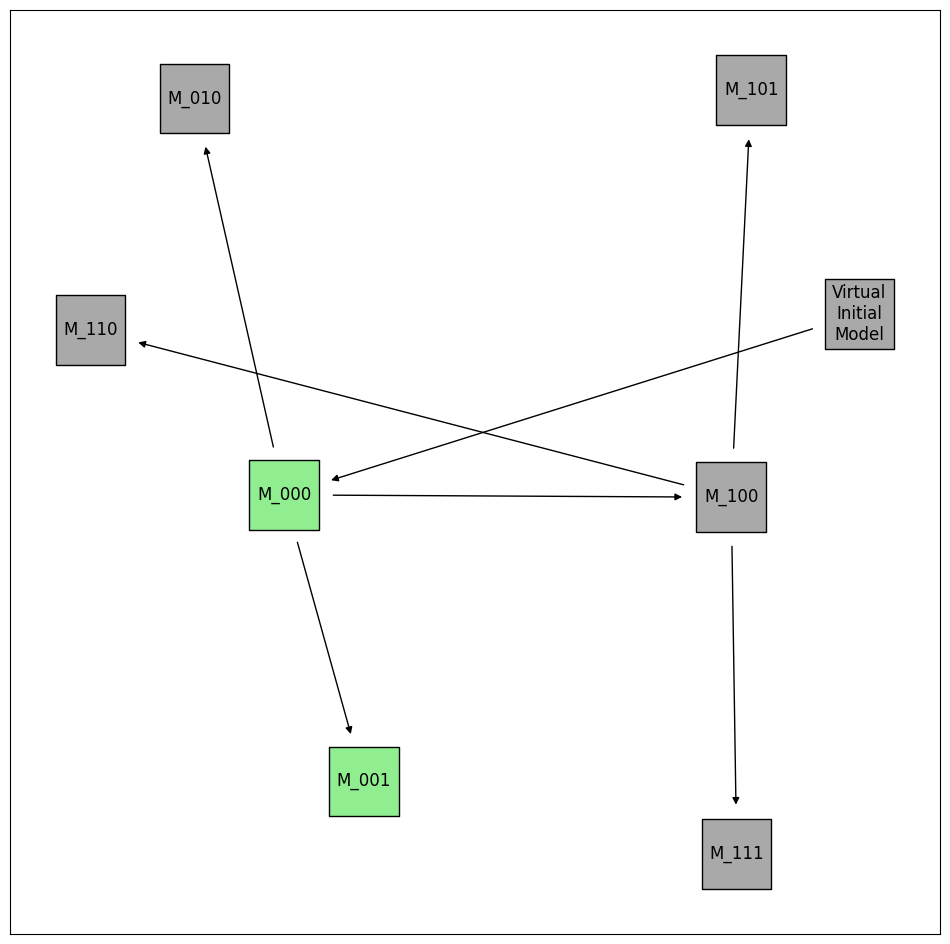

In [6]:
petab_select.plot.graph_history(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
);

## Criterion values of each model

This shows the criterion value of every calibrated model.

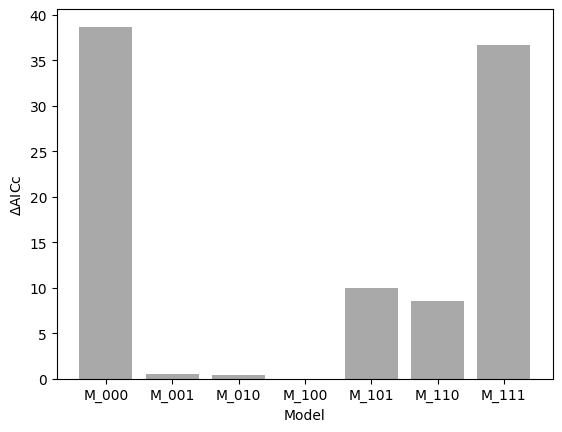

In [7]:
petab_select.plot.bar_criterion_vs_models(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
);

## Criterion values vs. number of estimated parameters

This shows all calibrated models.

In this example, models with 2 estimated parameters tend to perform best. This is also seen in the UpSet plot above.

Jitter is added to distinguish models with the same number of parameters and similar criterion values, according to the optional `max_jitter` argument.

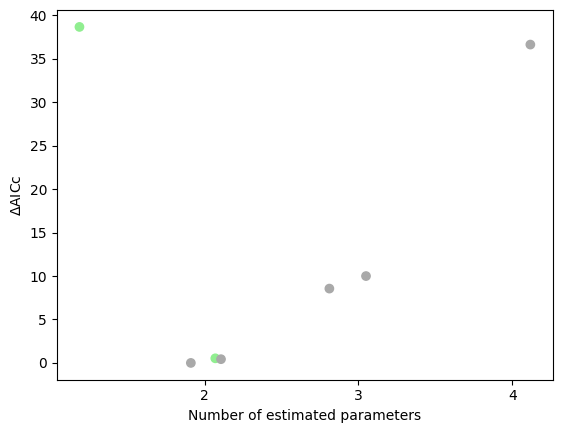

In [8]:
petab_select.plot.scatter_criterion_vs_n_estimated(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
    # Uncomment to turn off jitter.
    # max_jitter=0,
);

## History as layers in a hierarchical graph

This shows the relative change in parameters of each model, compared to its predecessor model.

Each column is an iteration.

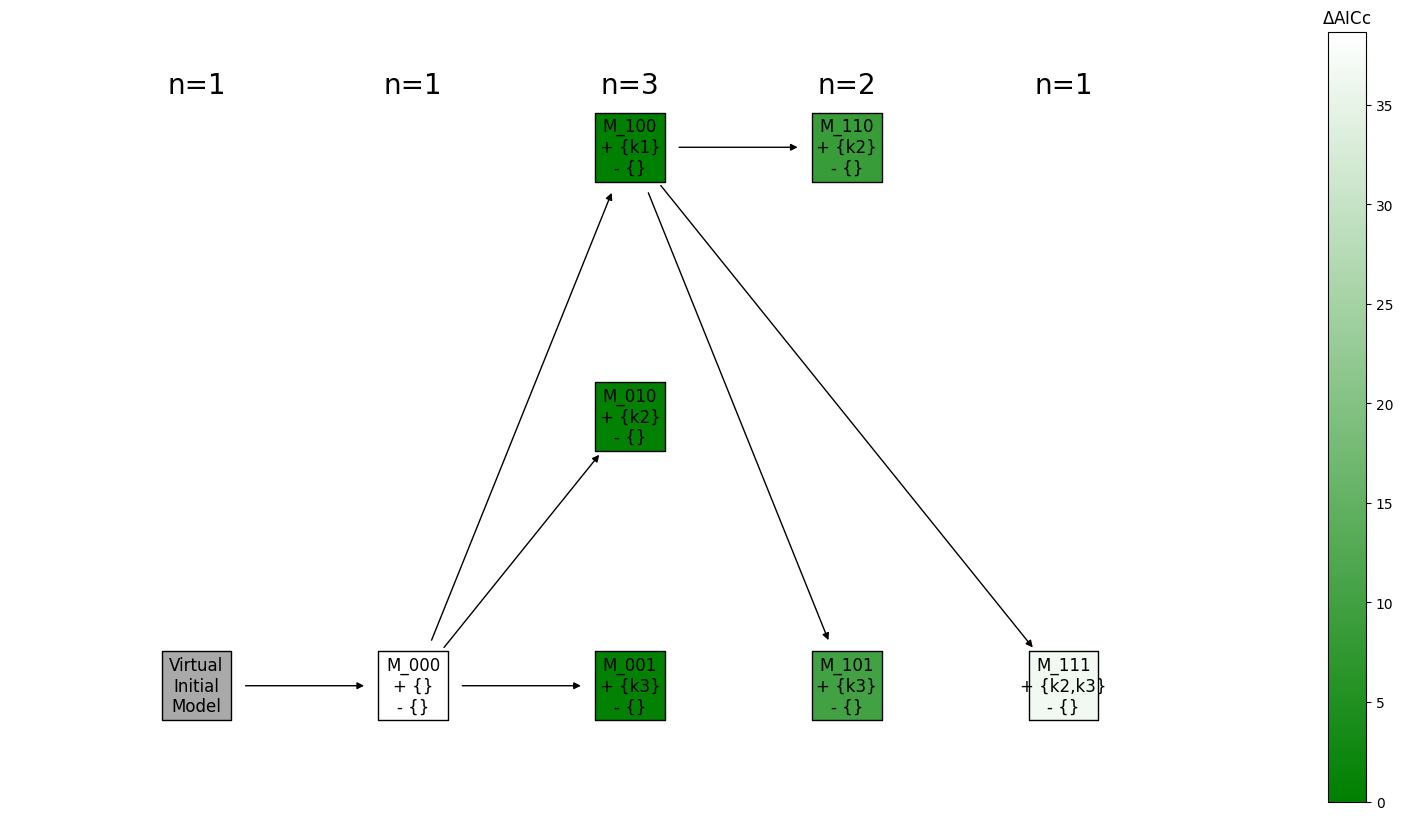

In [9]:
# # Customize the colors
# criterion_values = [model.get_criterion(petab_select.Criterion.AICC) for model in models]
# norm = matplotlib.colors.Normalize(
#     vmin=min(criterion_values),
#     vmax=max(criterion_values),
# )
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","lightgreen"])
# colorbar_mappable = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

petab_select.plot.graph_iteration_layers(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    draw_networkx_kwargs={
        "arrowstyle": "-|>",
        "node_shape": "s",
        "node_size": 2500,
        "edgecolors": "k",
    },
    # colorbar_mappable=colorbar_mappable,
);